In [ ]:
import numpy as np
import random
import math
# Load your dataset of 1000 cities with their coordinates
def load_dataset(filename):
    data = np.loadtxt(filename, delimiter=',')
    return data
# Replace 'full/path/to/cities.csv' with the actual full path to your dataset file
filename = "D:/MATERIALS/LEVEL 3/2/Evolutionary Algorithms/project/large.csv"
cities = load_dataset(filename)

# Calculate Euclidean distance between two cities
def distance(city1, city2):
    return np.linalg.norm(city1 - city2)

# Initialize a random route
def initial_route():
    route = list(range(num_cities))
    random.shuffle(route)
    return route

# Calculate the total distance of a route
def total_distance(route):
    total = 0
    for i in range(num_cities - 1):
        total += distance(cities[route[i]], cities[route[i+1]])
    total += distance(cities[route[-1]], cities[route[0]])  # Return to the starting city
    return total

# Simulated Annealing algorithm
def simulated_annealing(initial_route, initial_temp, cooling_rate, num_iterations):
    current_route = initial_route()
    best_route = current_route
    temp = initial_temp

    for i in range(num_iterations):
        new_route = current_route.copy()
        # Perform a random swap of two cities
        index1, index2 = random.sample(range(num_cities), 2)
        new_route[index1], new_route[index2] = new_route[index2], new_route[index1]
        
        current_energy = total_distance(current_route)
        new_energy = total_distance(new_route)
        
        # Acceptance probability
        if new_energy < current_energy or random.random() < math.exp((current_energy - new_energy) / temp):
            current_route = new_route
        
        # Update best route
        if total_distance(current_route) < total_distance(best_route):
            best_route = current_route

        # Cool the temperature
        temp *= cooling_rate
    
    return best_route

# Set initial parameters
initial_temp = 1000
cooling_rate = 0.95
num_iterations = 50000
num_cities = len(cities)

# Find the best route using Simulated Annealing
best_route = simulated_annealing(initial_route, initial_temp, cooling_rate, num_iterations)
best_distance = total_distance(best_route)

print("Best Route:", best_route)
print("Best Distance:", best_distance)


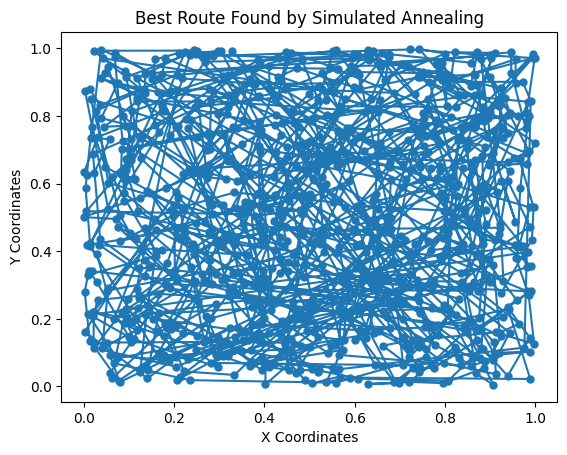

Best Route: [962, 772, 293, 890, 668, 641, 164, 371, 511, 431, 285, 213, 375, 201, 150, 864, 21, 302, 774, 995, 561, 518, 604, 259, 682, 831, 137, 312, 544, 849, 891, 722, 687, 648, 420, 315, 90, 453, 938, 964, 171, 139, 474, 27, 622, 902, 256, 850, 156, 559, 818, 384, 731, 165, 510, 934, 824, 130, 763, 319, 148, 98, 529, 153, 109, 895, 657, 307, 851, 103, 68, 565, 268, 452, 612, 784, 466, 686, 862, 885, 672, 905, 802, 563, 800, 523, 174, 306, 396, 597, 671, 494, 235, 492, 949, 93, 149, 771, 187, 236, 280, 525, 54, 603, 621, 321, 334, 638, 250, 470, 507, 441, 541, 505, 266, 457, 178, 254, 270, 737, 797, 152, 412, 630, 241, 35, 326, 373, 2, 410, 741, 807, 968, 645, 571, 479, 598, 226, 4, 142, 123, 469, 662, 274, 840, 928, 456, 912, 720, 186, 176, 299, 346, 759, 775, 732, 719, 62, 245, 357, 805, 594, 269, 13, 31, 769, 454, 929, 101, 275, 618, 333, 296, 503, 527, 10, 813, 20, 290, 667, 567, 628, 835, 317, 55, 712, 770, 854, 459, 948, 355, 814, 878, 983, 358, 102, 143, 658, 985, 920, 969, 

In [6]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Load your dataset of 1000 cities with their coordinates
def load_dataset(filename):
  data = np.loadtxt(filename, delimiter=',')
  return data

# Replace 'full/path/to/cities.csv' with the actual full path to your dataset file
filename = "D:/MATERIALS/LEVEL 3/2/Evolutionary Algorithms/project/large.csv"
cities = load_dataset(filename)

# Calculate Euclidean distance between two cities
def distance(city1, city2):
  return np.linalg.norm(city1 - city2)

# Initialize a random route
def initial_route():
  route = list(range(num_cities))
  random.shuffle(route)
  return route

# Calculate the total distance of a route
def total_distance(route):
  total = 0
  for i in range(num_cities - 1):
    total += distance(cities[route[i]], cities[route[i+1]])
  total += distance(cities[route[-1]], cities[route[0]])  # Return to the starting city
  return total

# Simulated Annealing algorithm
def simulated_annealing(initial_route, initial_temp, cooling_rate, num_iterations):
  current_route = initial_route()
  best_route = current_route
  temp = initial_temp

  for i in range(num_iterations):
    new_route = current_route.copy()
    # Perform a random swap of two cities
    index1, index2 = random.sample(range(num_cities), 2)
    new_route[index1], new_route[index2] = new_route[index2], new_route[index1]
  
    current_energy = total_distance(current_route)
    new_energy = total_distance(new_route)
  
    # Acceptance probability
    if new_energy < current_energy or random.random() < math.exp((current_energy - new_energy) / temp):
      current_route = new_route
  
    # Update best route
    if total_distance(current_route) < total_distance(best_route):
      best_route = current_route

    # Cool the temperature
    temp *= cooling_rate
  
  return best_route

# Set initial parameters
initial_temp = 1100
cooling_rate = 0.99
num_iterations = 40000
num_cities = len(cities)

# Find the best route using Simulated Annealing
best_route = simulated_annealing(initial_route, initial_temp, cooling_rate, num_iterations)
best_distance = total_distance(best_route)

# Plot the best route
xs = [cities[i][0] for i in best_route]  # Extract x-coordinates from best route
ys = [cities[i][1] for i in best_route]  # Extract y-coordinates from best route

plt.plot(xs, ys, 'o-', markersize=5)  # Plot route with blue circles and lines
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Best Route Found by Simulated Annealing')
plt.show()

print("Best Route:", best_route)
print("Best Distance:", best_distance)
